In [3]:
from google.colab import files
uploaded = files.upload()

Saving Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv to Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv


In [4]:
import pandas as pd

# Membaca file CSV yang sudah diupload
df = pd.read_csv('Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')

# Menampilkan 5 baris pertama
df.head()

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif


# **Penjelasan Dataset yang Digunakan**

# 1. Kasus yang diambil

Analisis Sentimen (Classification)

# 2. Penjelasan setiap kolom



1.   Komentar = Berisi teks ulasan/komentar dari publik
2.   Label = Berisi label sentimen yang telah ditentukan (positif/negatif)



# 3. Import library

In [72]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 4. Load data

**Membaca data**

In [73]:
df = pd.read_csv('Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')
df.head()

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif


# **Data Understanding**

# 1. Jumlah baris data

In [74]:
print(f"Jumlah Baris dan Kolom: {df.shape}")

Jumlah Baris dan Kolom: (398, 2)


# 2. Panjang rata-rata setiap baris

In [75]:
df['length'] = df['komentar'].apply(len)
panjang_rata_rata = df['length'].mean()
print(f"Panjang Rata-rata Komentar: {panjang_rata_rata:.2f} karakter")
print("-" * 35)

Panjang Rata-rata Komentar: 167.79 karakter
-----------------------------------


# 3. Cek data duplikasi

In [76]:
duplikasi = df.duplicated().sum()
print(f"Jumlah Data Duplikasi: {duplikasi}")

df[df.duplicated(keep=False)]

Jumlah Data Duplikasi: 4


,komentar,label,length
69,"<username> Udahalh juru kunci pasti ni timnas,...",negatif,147
73,<username> Dendy sama arhan punya aib nya sty ...,negatif,57
85,"<username> Udahalh juru kunci pasti ni timnas,...",negatif,147
88,<username> Dendy sama arhan punya aib nya sty ...,negatif,57
153,"<username> Dengan skuad rasa Eropa"" sepertinya...",negatif,177
154,"<username> Dengan skuad rasa Eropa"" sepertinya...",negatif,177
309,<username> <username> <username> Klo mnurut gw...,positif,284
350,<username> <username> <username> Klo mnurut gw...,positif,284


# 4. Cek data kosong

In [77]:
kosong = df.isnull().sum()
print("\nData Kosong (Missing Values):")
print(kosong)


Data Kosong (Missing Values):
komentar    0
label       0
length      0
dtype: int64


# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

**Perbandingan data positif dan data negatif**

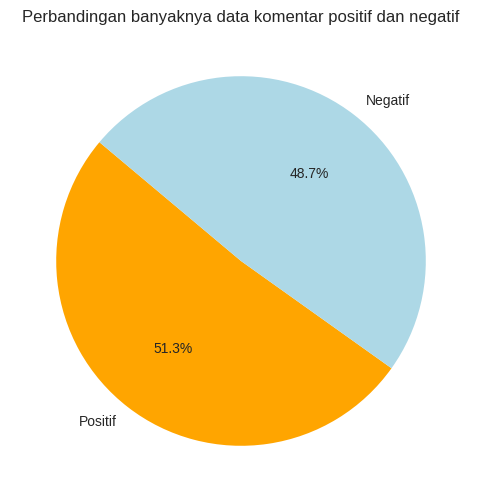

In [78]:
jumlah_komentar = df['label'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(jumlah_komentar, labels=['Positif', 'Negatif'], autopct='%1.1f%%', startangle=140, colors=['orange', 'lightblue'])
plt.title('Perbandingan banyaknya data komentar positif dan negatif')
plt.show()

In [79]:
# Pisahkan komentar positif dan negatif
import pandas as pd
from collections import Counter

komentar_positif = df[df['label'] == 'positif']['komentar']
komentar_negatif = df[df['label'] == 'negatif']['komentar']

kata_positif = Counter()
komentar_positif.apply(lambda x: kata_positif.update(x.split()))

kata_negatif = Counter()
komentar_negatif.apply(lambda x: kata_negatif.update(x.split()))

# mengetahui 10 kata yang paling sering digunakan
top_kata_positif = kata_positif.most_common(10)
top_kata_negatif = kata_negatif.most_common(10)

top_kata_positif_df = pd.DataFrame(top_kata_positif, columns=['Kata','Frekuensi'])
top_kata_negatif_df = pd.DataFrame(top_kata_negatif, columns=['Kata','Frekuensi'])

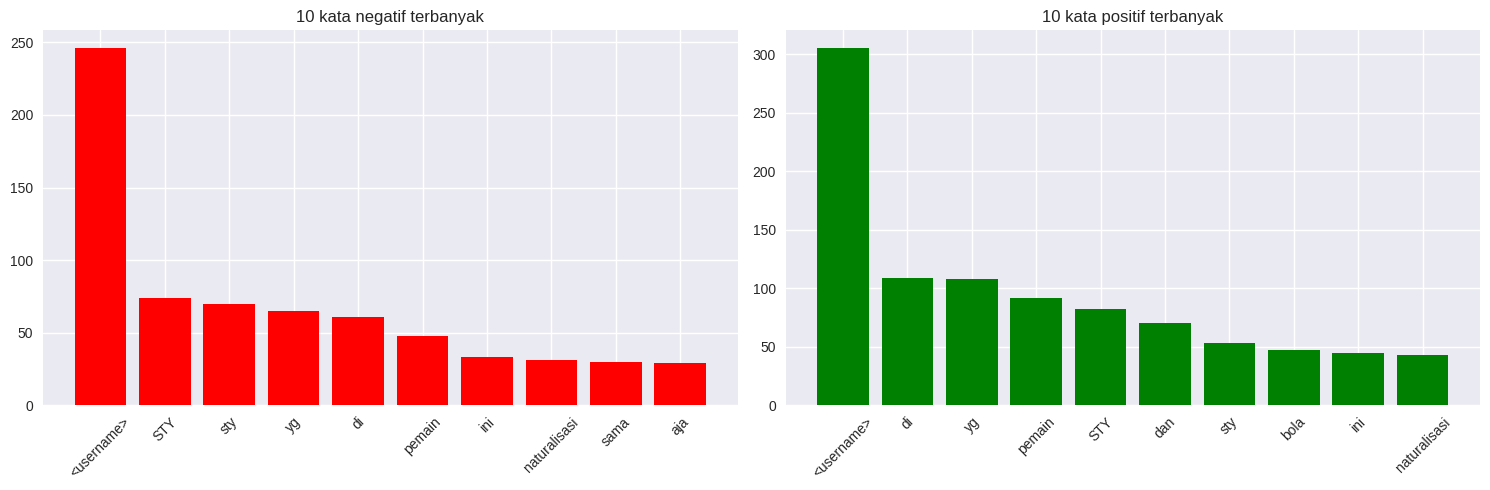

In [80]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(top_kata_negatif_df['Kata'], top_kata_negatif_df['Frekuensi'], color='red')
plt.title('10 kata negatif terbanyak')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(top_kata_positif_df['Kata'], top_kata_positif_df['Frekuensi'], color='green')
plt.title('10 kata positif terbanyak')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [89]:
# Pre-clean text sebelum tokenisasi
def basic_clean(text):
    text = text.lower()  # ubah ke huruf kecil
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hapus mention @username
    text = re.sub(r'http\S+', '', text)  # hapus URL
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # hapus angka, tanda baca, emoji
    text = re.sub(r'\s+', ' ', text).strip()  # rapikan spasi
    return text

# buat kolom teks bersih dasar
df['clean_teks'] = df['komentar'].apply(basic_clean)

# **Data Text Processing**

In [ ]:
# 🧹 Pre-clean text sebelum tokenisasi
def basic_clean(text):
    text = text.lower()  # ubah ke huruf kecil
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hapus mention @username
    text = re.sub(r'http\S+', '', text)  # hapus URL
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # hapus angka, tanda baca, emoji
    text = re.sub(r'\s+', ' ', text).strip()  # rapikan spasi
    return text

# buat kolom teks bersih dasar
df['clean_teks'] = df['komentar'].apply(basic_clean)

# 1. Tokenisasi

In [97]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_teks'].apply(lambda x: word_tokenize(x))
df[['komentar', 'clean_teks', 'tokens']].head()

,komentar,clean_teks,tokens
0,<username> Simulasi indonesia kembali dijajah ...,username simulasi indonesia kembali dijajah ke...,"[username, simulasi, indonesia, kembali, dijaj..."
1,<username> <username> <username> keturunan lai...,username username username keturunan lain yang...,"[username, username, username, keturunan, lain..."
2,<username> <username> uda botak keturunan penj...,username username uda botak keturunan penjajah...,"[username, username, uda, botak, keturunan, pe..."
3,"<username> <username> <username> Belum tentu, ...",username username username belum tentu gak sem...,"[username, username, username, belum, tentu, g..."
4,<username> <username> <username> Lu nya aja yg...,username username username lu nya aja yg bego ...,"[username, username, username, lu, nya, aja, y..."


In [91]:
print(df['tokens'].head())

0    [username, simulasi, indonesia, kembali, dijaj...
1    [username, username, username, keturunan, lain...
2    [username, username, uda, botak, keturunan, pe...
3    [username, username, username, belum, tentu, g...
4    [username, username, username, lu, nya, aja, y...
Name: tokens, dtype: object


# 2. Stopword removal

In [92]:
stop_words = set(stopwords.words('indonesian'))

def clean_tokens(tokens):
    cleaned = []
    for word in tokens:
        word = re.sub(r'\d+', '', word)  # hapus angka
        word = word.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
        if word and word.lower() not in stop_words:
            cleaned.append(word.lower())
    return cleaned

df['cleaned'] = df['tokens'].apply(clean_tokens)

# 3. Text Normalization

In [93]:
normalisasi_kamus = {
   "ga": "tidak",
    "gak": "tidak",
    "nggak": "tidak",
    "ngga": "tidak",
    "tdk": "tidak",
    "uda": "sudah",
    "udah": "sudah",
    "bgt": "banget",
    "bener": "benar",
    "bener2": "benar-benar",
    "jg": "juga",
    "aja": "saja",
    "kok": "mengapa",
    "tp": "tapi",
    "krn": "karena",
    "yg": "yang",
    "dlm": "dalam",
    "blm": "belum",
    "dgn": "dengan",
    "trus": "terus",
    "sm": "sama",
    "kalo": "kalau",
    "kl": "kalau",
    "pls": "tolong",
   "lu": "kamu"
}

def normalize_text(tokens):
    return [normalisasi_kamus.get(t, t) for t in tokens]

df['normalized'] = df['tokens'].apply(normalize_text)
df[['komentar', 'tokens', 'normalized']].head()

,komentar,tokens,normalized
0,<username> Simulasi indonesia kembali dijajah ...,"[username, simulasi, indonesia, kembali, dijaj...","[username, simulasi, indonesia, kembali, dijaj..."
1,<username> <username> <username> keturunan lai...,"[username, username, username, keturunan, lain...","[username, username, username, keturunan, lain..."
2,<username> <username> uda botak keturunan penj...,"[username, username, uda, botak, keturunan, pe...","[username, username, sudah, botak, keturunan, ..."
3,"<username> <username> <username> Belum tentu, ...","[username, username, username, belum, tentu, g...","[username, username, username, belum, tentu, t..."
4,<username> <username> <username> Lu nya aja yg...,"[username, username, username, lu, nya, aja, y...","[username, username, username, kamu, nya, saja..."


# 4. Lemmatization

In [94]:
lemmatizer = WordNetLemmatizer()

In [99]:
df['lemmatized'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])
df[['komentar', 'lemmatized']].head()

,komentar,lemmatized
0,<username> Simulasi indonesia kembali dijajah ...,"[username, simulasi, indonesia, kembali, dijaj..."
1,<username> <username> <username> keturunan lai...,"[username, username, username, keturunan, lain..."
2,<username> <username> uda botak keturunan penj...,"[username, username, uda, botak, keturunan, pe..."
3,"<username> <username> <username> Belum tentu, ...","[username, username, username, belum, tentu, g..."
4,<username> <username> <username> Lu nya aja yg...,"[username, username, username, lu, nya, aja, y..."


# 5. Stemming

In [51]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['stemmed'] = df['lemmatized'].apply(lambda tokens: [stemmer.stem(t) for t in tokens])
df[['lemmatized', 'stemmed']].head()

,lemmatized,stemmed
0,"[<, username, >, simulasi, indonesia, kembali,...","[<, usernam, >, simulasi, indonesia, kembali, ..."
1,"[<, username, >, <, username, >, <, username, ...","[<, usernam, >, <, usernam, >, <, usernam, >, ..."
2,"[<, username, >, <, username, >, uda, botak, k...","[<, usernam, >, <, usernam, >, uda, botak, ket..."
3,"[<, username, >, <, username, >, <, username, ...","[<, usernam, >, <, usernam, >, <, usernam, >, ..."
4,"[<, username, >, <, username, >, <, username, ...","[<, usernam, >, <, usernam, >, <, usernam, >, ..."


# 6. Matrix correlation

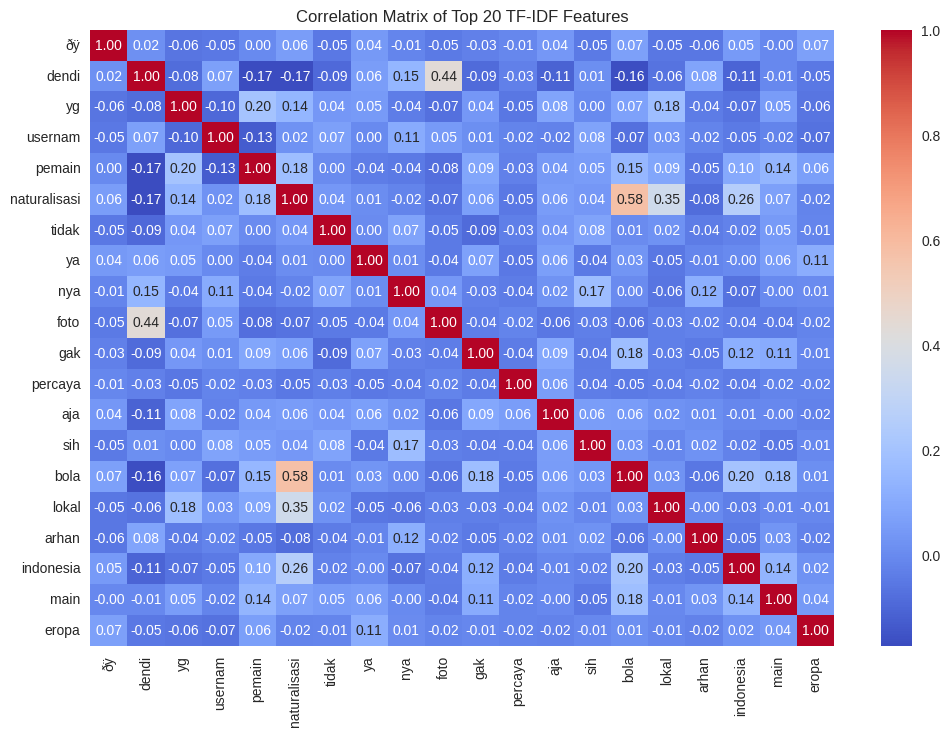

In [101]:
# Ubah TF-IDF sparse matrix menjadi DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Karena fitur sangat banyak, kita ambil 20 kata teratas berdasarkan varians (biar visualnya jelas)
top_features = tfidf_df.var().sort_values(ascending=False).head(20).index
corr_matrix = tfidf_df[top_features].corr()

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top 20 TF-IDF Features")
plt.show()

#7. Labeling data (lexicon)

In [102]:
positif = ["bagus", "keren", "hebat", "juara", "menang", "mantap", "baik", "unggul"]
negatif = ["jelek", "buruk", "kalah", "parah", "lemah", "kecewa", "payah", "jatuh"]

def get_sentiment(tokens):
    pos = sum(1 for t in tokens if t in positif)
    neg = sum(1 for t in tokens if t in negatif)
    if pos > neg:
        return "positif"
    elif neg > pos:
        return "negatif"
    else:
        return "netral"

df['label_auto'] = df['normalized'].apply(get_sentiment)
df[['komentar', 'label_auto']].head(10)

,komentar,label_auto
0,<username> Simulasi indonesia kembali dijajah ...,positif
1,<username> <username> <username> keturunan lai...,netral
2,<username> <username> uda botak keturunan penj...,netral
3,"<username> <username> <username> Belum tentu, ...",netral
4,<username> <username> <username> Lu nya aja yg...,netral
5,<username> Saya punya saran kepada <username> ...,netral
6,Ini STY ga coba asnawi jadi gelandang aja? VO2...,netral
7,<username> <username> <username> Bukan masalah...,netral
8,"<username> Biasa, sty klo tantrum kan gtu. Sem...",netral
9,<username> Setelah pulang ke tanah air apakah ...,netral


# 8. Text vektorisasi (TF-IDF)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['normalized'].apply(lambda x: ' '.join(x)))
y = df['label_auto']   # atau df['label'] jika kamu sudah punya label asli

# 9. Data splitting dengan skala (80:20)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (318, 2267)
Ukuran data uji: (80, 2267)


# **Data modelling**

# 1. Melatih model logistic regresion

Model yang digunakan pada tahap ini adalah Logistic Regression,
yaitu salah satu algoritma machine learning supervised yang umum digunakan untuk klasifikasi teks, termasuk analisis sentimen.

Berdasarkan hasil pelatihan, model Logistic Regression dipilih karena memiliki tingkat akurasi yang baik, stabil pada data teks berukuran kecil hingga menengah, serta mudah diimplementasikan menggunakan pustaka scikit-learn.

In [57]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
model = LogisticRegression(max_iter=200)

# Latih model dengan data training
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# **Data evaluasi**

# 1. Confussion matrix

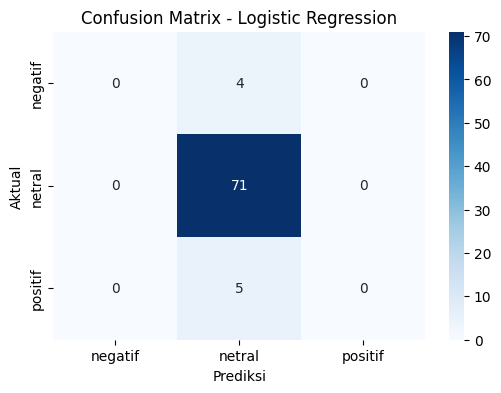

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi label untuk data uji
y_pred = model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=model.classes_,
    yticklabels=model.classes_
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 2. Laporan klasifikasi

In [61]:
from sklearn.metrics import accuracy_score, classification_report

# Akurasi model
akurasi = accuracy_score(y_test, y_pred)
print(f"🔹 Akurasi Model: {akurasi:.2f}")

# Laporan klasifikasi (Precision, Recall, F1-score)
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

🔹 Akurasi Model: 0.89

🔹 Classification Report:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         4
      netral       0.89      1.00      0.94        71
     positif       0.00      0.00      0.00         5

    accuracy                           0.89        80
   macro avg       0.30      0.33      0.31        80
weighted avg       0.79      0.89      0.83        80



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
print(df['tokens'].head())

0    [<, username, >, simulasi, indonesia, kembali,...
1    [<, username, >, <, username, >, <, username, ...
2    [<, username, >, <, username, >, uda, botak, k...
3    [<, username, >, <, username, >, <, username, ...
4    [<, username, >, <, username, >, <, username, ...
Name: tokens, dtype: object


# **Data prediksi**

In [62]:
# Contoh beberapa teks baru untuk diuji
data_baru = [
    "Timnas Indonesia bermain sangat bagus dan solid!",
    "Permainannya membosankan, banyak kesalahan sendiri.",
    "Pelatih membuat strategi yang cukup baik meski belum maksimal."
]

# Ubah teks baru menjadi bentuk vektor (harus sama seperti proses training)
data_baru_tfidf = vectorizer.transform(data_baru)

# Lakukan prediksi dengan model yang sudah dilatih
prediksi = model.predict(data_baru_tfidf)

# Tampilkan hasil
for teks, label in zip(data_baru, prediksi):
    print(f"Teks: {teks}")
    print(f"Prediksi Sentimen: {label}")
    print("-" * 60)

Teks: Timnas Indonesia bermain sangat bagus dan solid!
Prediksi Sentimen: netral
------------------------------------------------------------
Teks: Permainannya membosankan, banyak kesalahan sendiri.
Prediksi Sentimen: netral
------------------------------------------------------------
Teks: Pelatih membuat strategi yang cukup baik meski belum maksimal.
Prediksi Sentimen: netral
------------------------------------------------------------


# Exploratory Data Analysis (EDA)

**Menganalisa contoh komentar positif dan negatif**

In [26]:
for i in range(1,11):
    print('email #', i)
    komentar_positif = df[df['label'] == 'positif']['komentar'].iloc[i]
    print(komentar_positif + '\n')

email # 1
< > indonesia 0-2 libya ( sty pasti berbenah baik taktik & amp susunan pemain . tapi libya sepertinya masih akan unggul ) # strategibola # tebakskor # indonesia # libya < > < > < >

email # 2
< > suka tidak suka coach sty lah berhasil membawa gairah positif untuk timnas level senior . karena sejak evan dimas cs berhasil juala aff u19 orang2 cenderung lebih mengikuti timnas level junior ketimbang senior karena peforma timnas senior waktu jelek .

email # 3
< > paling kerja keras tinggi menurut sty kalau lokal ada 2 pemain .. asnawi pratama arhan . dia sering bikin contoh 2 pemain ketika ngelatih timnas kelompok umur . arhan pas masih sering main emang gg .. salah pilih klub dia

email # 4
< > < > salah satu alasan juga knp klub2 korea ttp ngelirik asnawi , krn dari data statistik mereka pasti asnawi msh terhitung bagus buat standar kuota pemain asing , bukan masalah koneksi sty dll . arhan juga trmasuk kategori .

email # 5
< > < > tolonglah , sty ngelath dri rank 170an , tekh

Dari 10 contoh yang diberikan, dapat dilihat bahwa komentar dengan sentimen positif ditandai dengan rasa kepercayaan yang tinggi kepada pelatih, apresiasi pencapaian pelatih, kekaguman terhadap pelatih, serta terkesan membela timnas yang dilatih oleh STY.

In [27]:
for i in range(1,11):
    print('email #', i)
    komentar_negatif = df[df['label'] == 'negatif']['komentar'].iloc[i]
    print(komentar_negatif + '\n')

email # 1
< > < > < > keturunan lain gak main bola emang bisa naturalisasi istimewa ? kepentingan negara sesuatu subjektif tergantung petingginya . akal akalan . naturalisasi biasa wajib bisa bahasa indonesia .

email # 2
< > < > uda botak keturunan penjajah , sok si paling paham tentang bola lu . coach mentok karir ngelatih futsal sok oke lu anjing

email # 3
< > < > < > belum tentu , gak semuanya jadi pemain bola . milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas . kalau pssi cuma fokus ke pemain keturunan mah sama mempersempit kolam mereka sendiri .

email # 4
< > < > < > lu nya bego . makanya nonton sendiri tolol . persepsi orang beda * nggak harus sama bego . memang coach tolol sty tolol out udah

email # 5
< > saya punya saran kepada < > < > < > kita terkenal dengan pola permainan cepat jika dihilangkan maka bahaya besar dalam persepak bolaan kita , . jadi mohon disampaikan ke < > . ciri khas permainan kita ! ! !

email # 6
sty ga coba asnawi jadi gel

Dari 10 contoh komentar negatif, dapat dilihat bahwa komentar bersentimen negatif mengandung kata-kata kasar, terkesan tidak percaya strategi pelatih, mempermasalahkan pemain keturunan (atau naturalisasi), dan tidak jarang meminta pelatih STY untuk tidak melatih timnas.